<a href="https://colab.research.google.com/github/Harshit-tech9/Advance_Housing_Price_Regression/blob/main/Advance_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
sns.set_palette("bright")

In [2]:
# Reading CSV file
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# getting shape of dataframe
df.shape

(1460, 81)

In [4]:
# Now we will calculate percentage of null values present in every column and
# we will drop those columns in which null values are present for more than 30%
cols = list(df.columns)
columns = []
for i in cols:
  percent = df[i].isna().sum()/len(df) * 100
  if percent > 30:
    columns.append(i)

print(columns)

# Dropping all columns with null values > 30 %
df.drop(columns = columns, inplace = True)
display(df.shape)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


(1460, 76)

In [5]:
# Now checking data type of every columns and changinf its data type if necessary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# Calculating Null values present in column with data types object.
df_Object = df.select_dtypes('object')
pd.DataFrame(df_Object.isna().sum()).T

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,37,37,38,37,38,0,0,0,1,0,0,81,81,81,81,0,0,0


Now we need to impute the null columns with mode. We are just assuming. Imputation should happen based on domain knowledge only.

In [7]:
#Creating a list of object columns
ObjectCols = list(df_Object.columns)

# Creating a list of float columns
df_float = df.select_dtypes('float64')
floatCols = list(df_float.columns)

# Doing the imputation of float and object columns. Float columns will be imputed with the median value and object columns are imputed with mode.
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
SI = SimpleImputer(strategy='mean', missing_values=np.nan)

df[floatCols] = SI.fit_transform(df[floatCols])  # Imputing Float columns
df[ObjectCols] = imputer.fit_transform(df[ObjectCols])  #imputing object columns
pd.DataFrame(df.isna().sum()).T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_int = df.select_dtypes('int64')
pd.DataFrame(df_int.isna().sum()).T

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There are no null values present in the column of type integer

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Now we have a no null values present in our dataset

In [10]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

# Exploratory Data Analysis

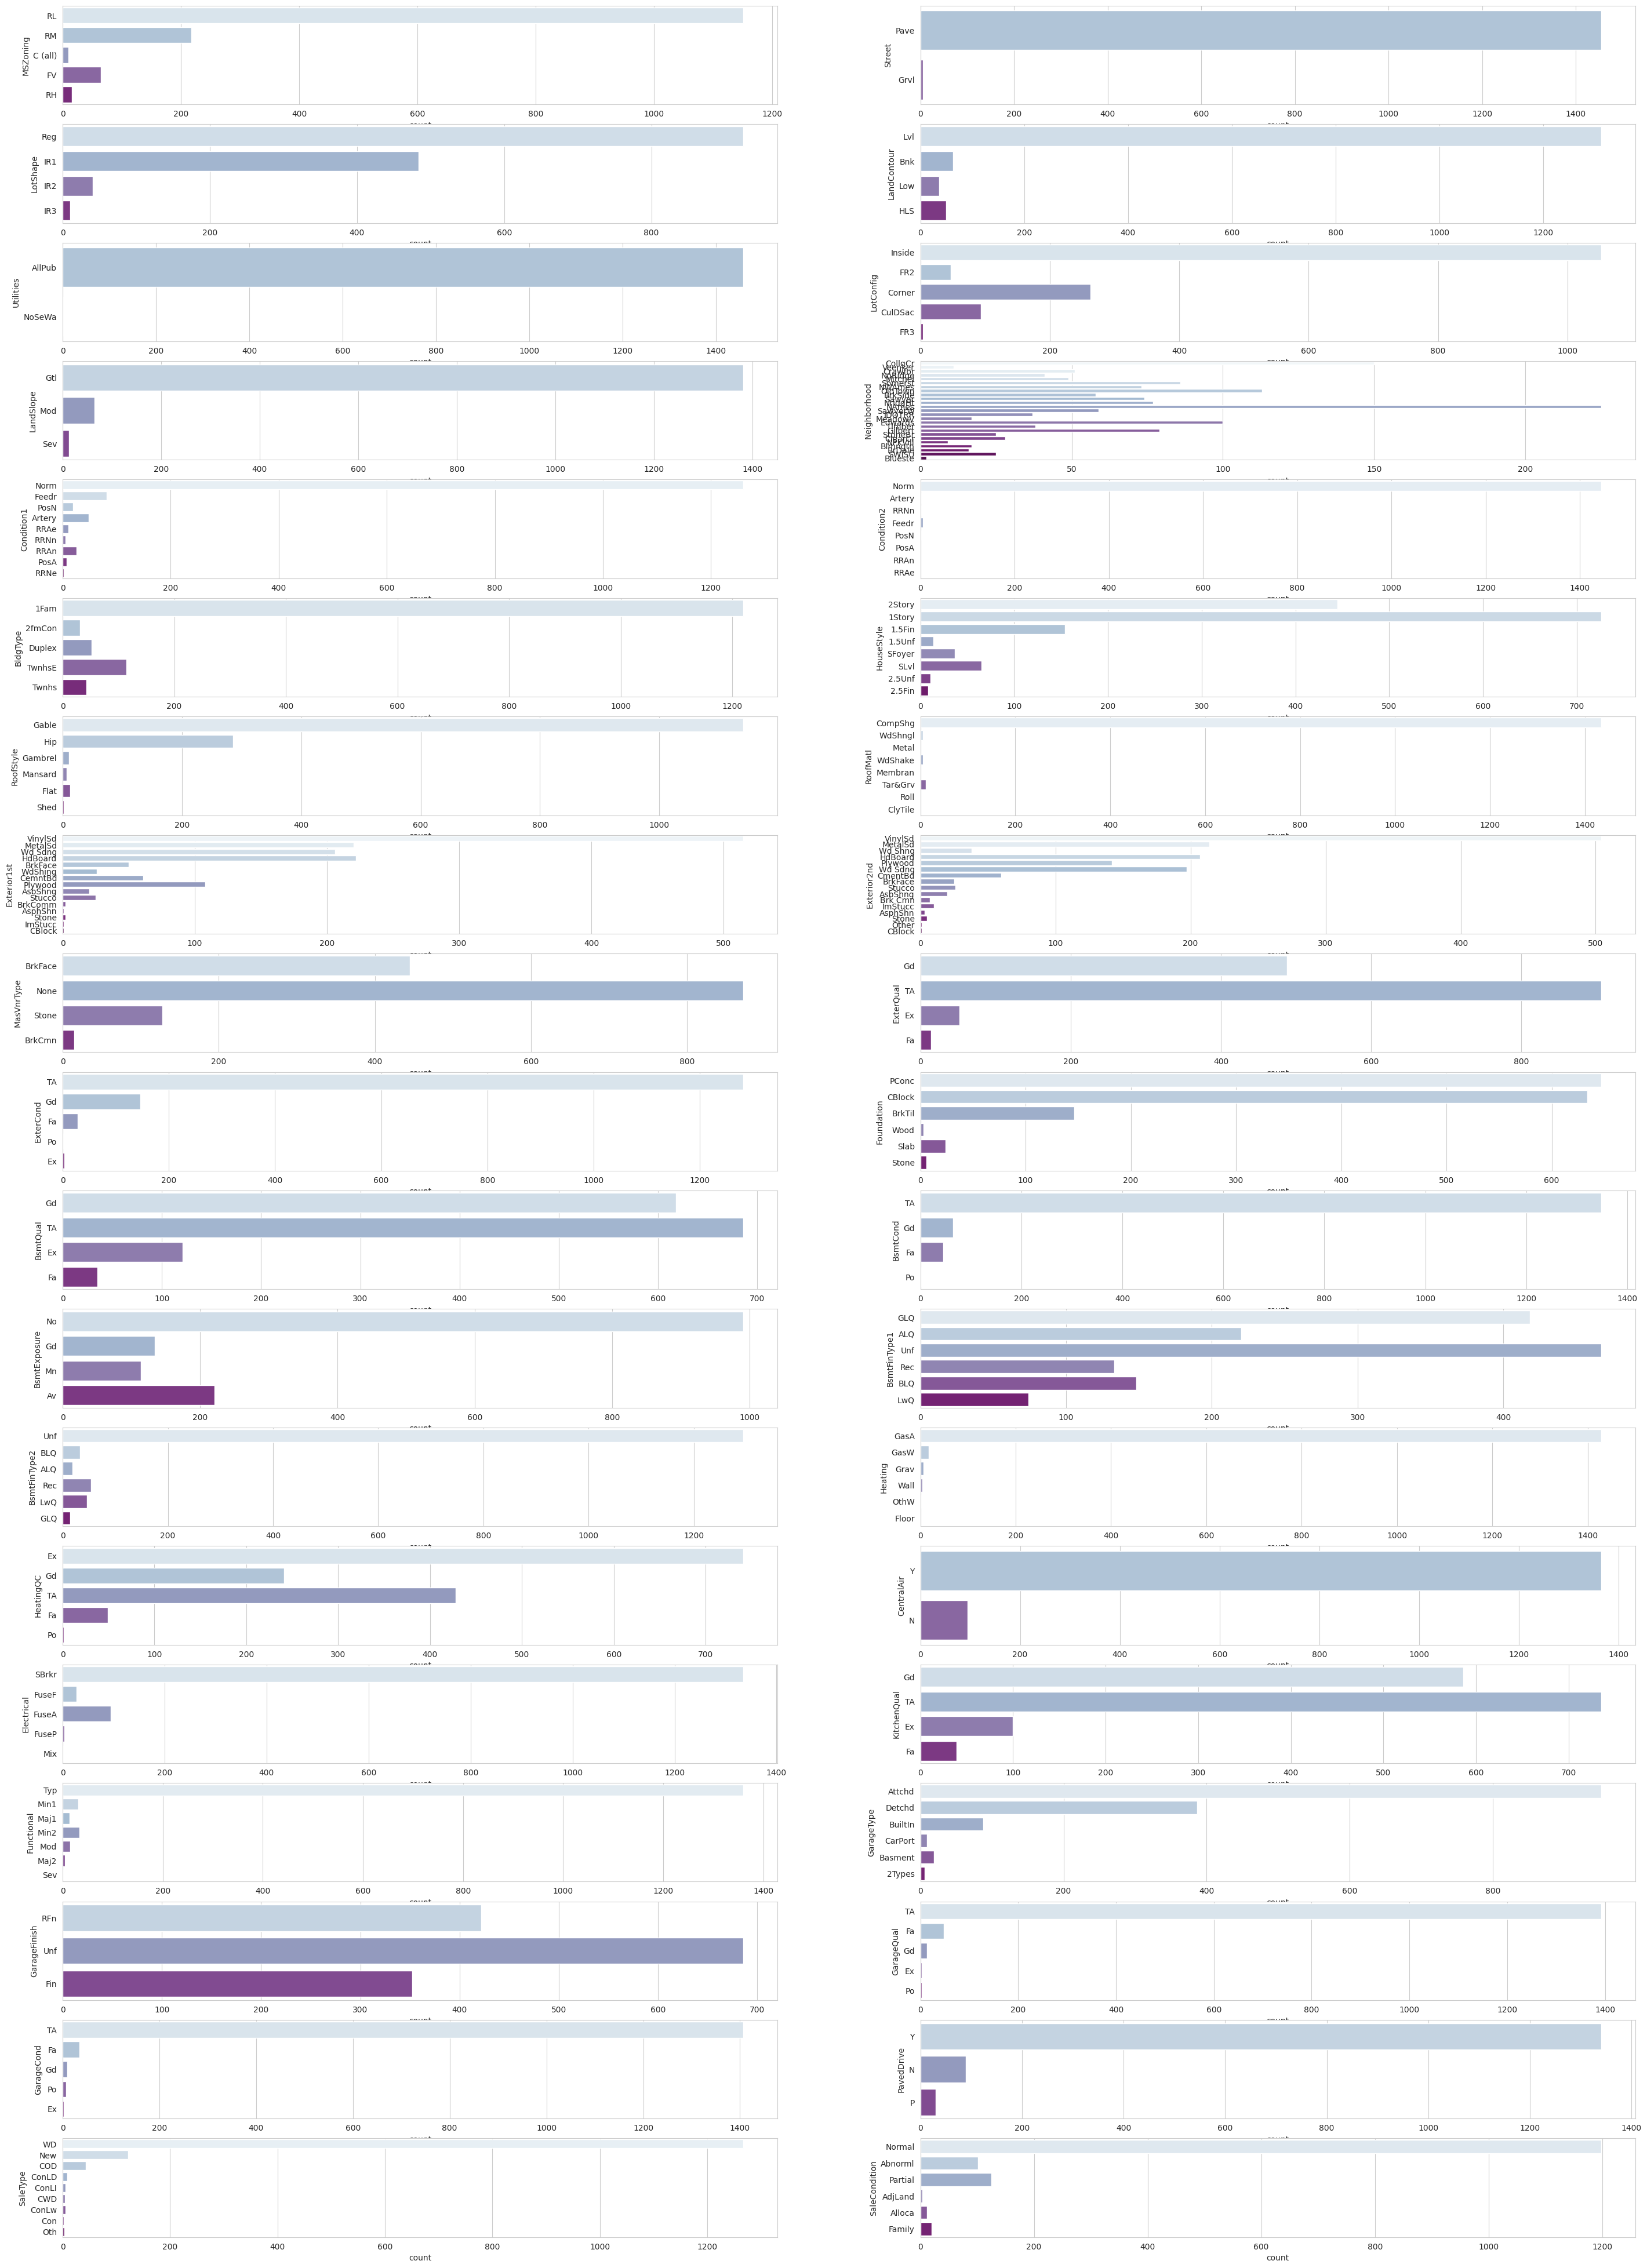

In [11]:
# PLotting all categorical features.
cat_features = df[ObjectCols]
fig, ax = plt.subplots(19,2, figsize = (35, 50))

for i, subplots in zip(cat_features, ax.ravel()):
  sns.countplot(y = cat_features[i], ax = subplots, palette = 'BuPu')

plt.show()

In [12]:
# Doing One Hot Encoding of categorical features
dfObject = pd.get_dummies(df[ObjectCols])
print(dfObject.shape)
dfObject.head()

(1460, 234)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [13]:
# Dropping column with n-1 levels.
colDrop = ['MSZoning_RM', 'Street_Pave', 'LotShape_Reg', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_Inside',
           'LandSlope_Sev', 'Neighborhood_Veenker', 'Condition1_RRNn', 'Condition2_RRNn', 'BldgType_TwnhsE', 'HouseStyle_SLvl',
           'RoofStyle_Shed', 'RoofMatl_WdShngl', 'Exterior1st_WdShing', 'Exterior2nd_Wd Shng', 'MasVnrType_Stone', 'ExterCond_TA',
           'Foundation_Wood', 'BsmtCond_TA', 'BsmtFinType2_Unf', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_TA',
           'Functional_Typ', 'GarageFinish_Unf', 'GarageCond_TA', 'PavedDrive_Y', 'SaleType_WD', 'SaleCondition_Partial']

dfObject.drop(columns = colDrop, inplace = True)
dfObject.shape

(1460, 203)

In [14]:
# Dropping all the object columns and concatenating it with dfObject.
df.drop(columns=ObjectCols, inplace=True)
finalDf = pd.concat([df, dfObject], axis=1)
finalDf.shape

(1460, 241)

In [15]:
# plotting correlation map
corr = finalDf.corr(method='pearson')
sorted_mat = corr.unstack().sort_values()

sorted_df = pd.DataFrame(sorted_mat, columns = ['correlation'])

### Dropping all the columns with high negative and positive correlation. Here, we are asssuming the value of 0.5 for and -0.5 for high negative and positive correlation.

In [16]:
sort_df_pos_05 = sorted_df[sorted_df['correlation'] > 0.5]
sort_df_pos_05 = sort_df_pos_05[sort_df_pos_05['correlation'] != 1]

sort_df_neg_05 = sorted_df[sorted_df['correlation'] < -0.5]
sort_df_neg_05 = sort_df_neg_05[sort_df_neg_05['correlation'] != -1]

In [17]:
pos_col = list(set(sort_df_pos_05.index.get_level_values(0)))
neg_col = list(set(sort_df_neg_05.index.get_level_values(0)))

In [18]:
# Extending the pos_col with neg_col
pos_col.extend(neg_col)
pos_col = list(set(pos_col))

In [19]:
pos_col.remove("SalePrice")

In [20]:
finalDf.drop(columns = pos_col, inplace=True)
len(finalDf)

1460

In [21]:
corr = finalDf.corr(method='pearson')
sorted_mat = corr.unstack().sort_values()

sorted_df = pd.DataFrame(sorted_mat, columns = ['correlation'])

sort_df_pos_05 = sorted_df[sorted_df['correlation'] > 0.5]
sort_df_pos_05 = sort_df_pos_05[sort_df_pos_05['correlation'] != 1]

sort_df_neg_05 = sorted_df[sorted_df['correlation'] < -0.5]
sort_df_neg_05 = sort_df_neg_05[sort_df_neg_05['correlation'] != -1]

pos_col = list(set(sort_df_pos_05.index.get_level_values(0)))
neg_col = list(set(sort_df_neg_05.index.get_level_values(0)))

# Extending the pos_col with neg_col
pos_col.extend(neg_col)
pos_col = list(set(pos_col))
print(len(pos_col))

finalDf.drop(columns = pos_col, inplace=True)
finalDf.shape

0


(1460, 144)

Here, there are no highly positively correlated and highly negatively correlated value present in our dataset.

In [22]:
finalDf.head()

,Id,LotFrontage,LotArea,OverallCond,BsmtFinSF2,BsmtHalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_RH,MSZoning_RL,Street_Grvl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Artery,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,BldgType_2fmCon,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Unf,HouseStyle_SFoyer,RoofStyle_Gambrel,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_WdShake,Exterior1st_CBlock,Exterior1st_ImStucc,Exterior1st_Stone,Exterior2nd_CBlock,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,MasVnrType_BrkCmn,ExterQual_Fa,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,Foundation_Slab,Foundation_Stone,BsmtQual_Fa,BsmtCond_Fa,BsmtCond_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,Heating_Floor,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,KitchenQual_Fa,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageFinish_Fin,GarageFinish_RFn,GarageQual_Gd,GarageCond_Fa,GarageCond_Gd,PavedDrive_N,PavedDrive_P,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,1,65.0,8450,5,0,0,0,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,80.0,9600,8,0,1,1,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,68.0,11250,5,0,0,1,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,60.0,9550,5,0,0,1,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,84.0,14260,5,0,0,1,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
numDf = finalDf.select_dtypes('int64', 'float64')
numDf.shape

(1460, 16)

In [24]:
numDf.drop(columns='Id', inplace=True)

In [25]:
numDf.head()

,LotArea,OverallCond,BsmtFinSF2,BsmtHalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,8450,5,0,0,0,0,61,0,0,0,0,0,2,2008,208500
1,9600,8,0,1,1,298,0,0,0,0,0,0,5,2007,181500
2,11250,5,0,0,1,0,42,0,0,0,0,0,9,2008,223500
3,9550,5,0,0,1,0,35,272,0,0,0,0,2,2006,140000
4,14260,5,0,0,1,192,84,0,0,0,0,0,12,2008,250000


In [26]:
numDfCols = ['LotArea', 'BsmtFinSF2', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']
numDf = numDf[numDfCols]

### Plotting correaltion map of all values.

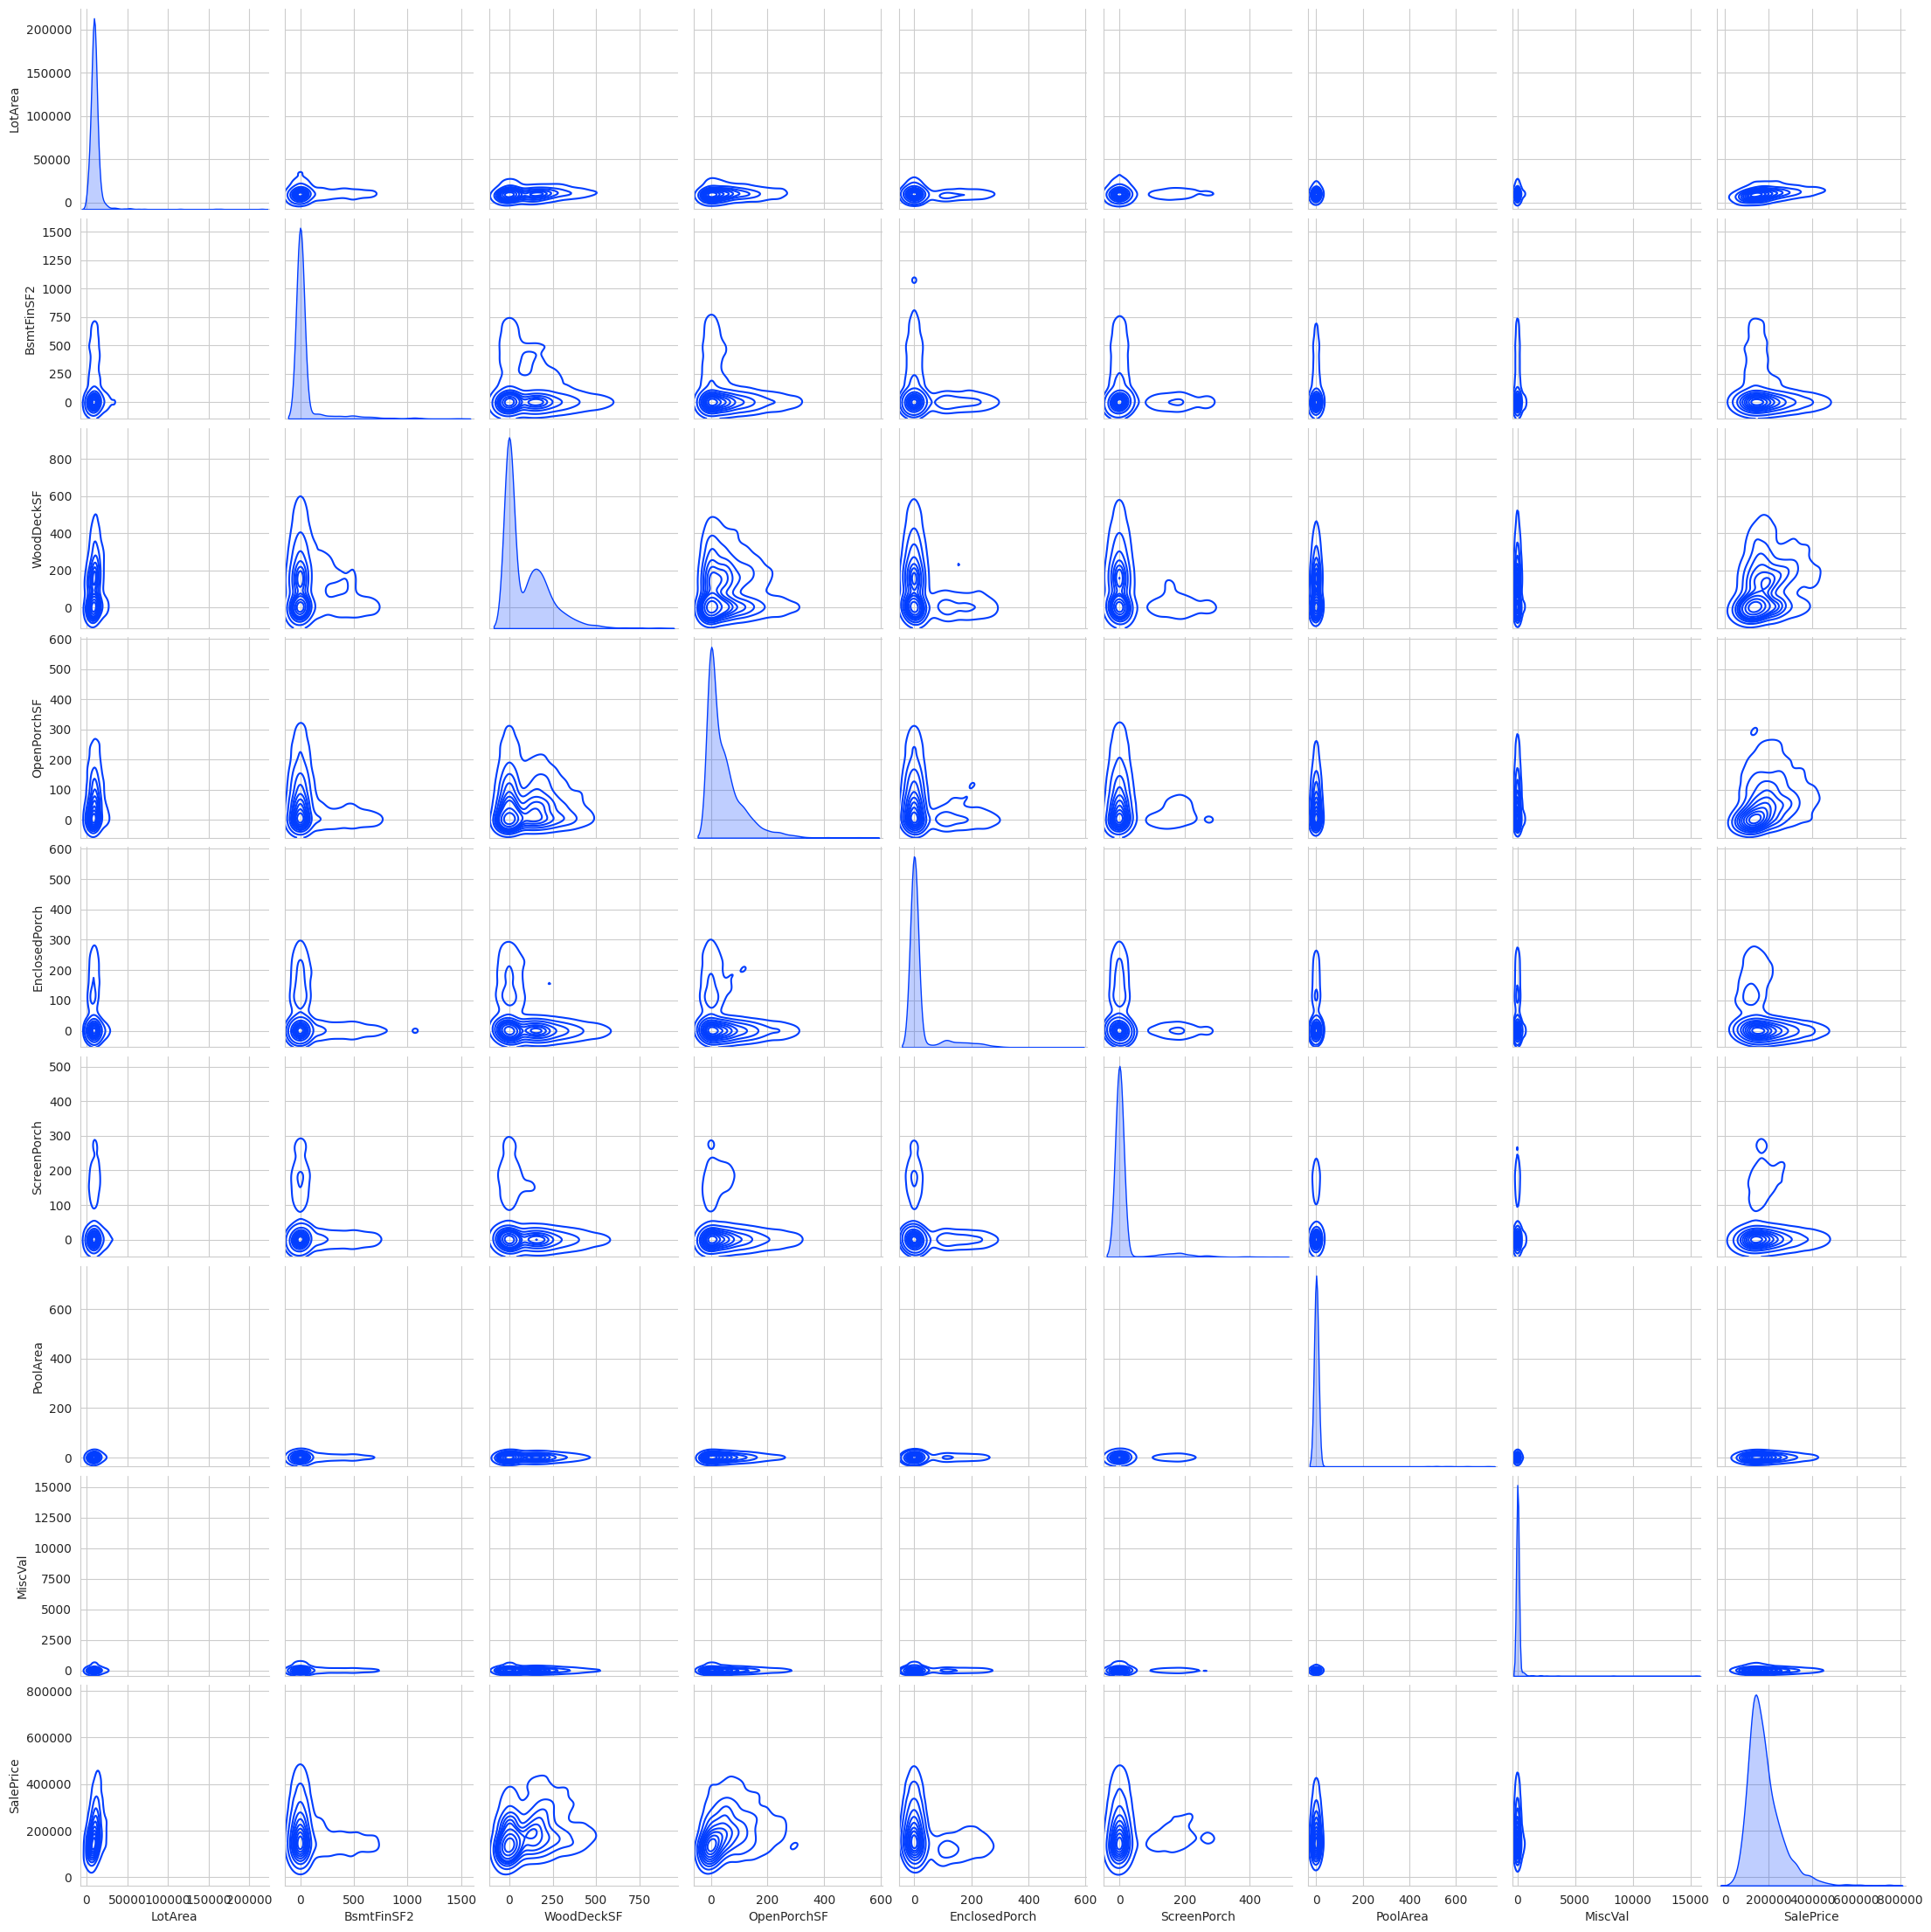

In [27]:
sns.pairplot(numDf, kind='kde')

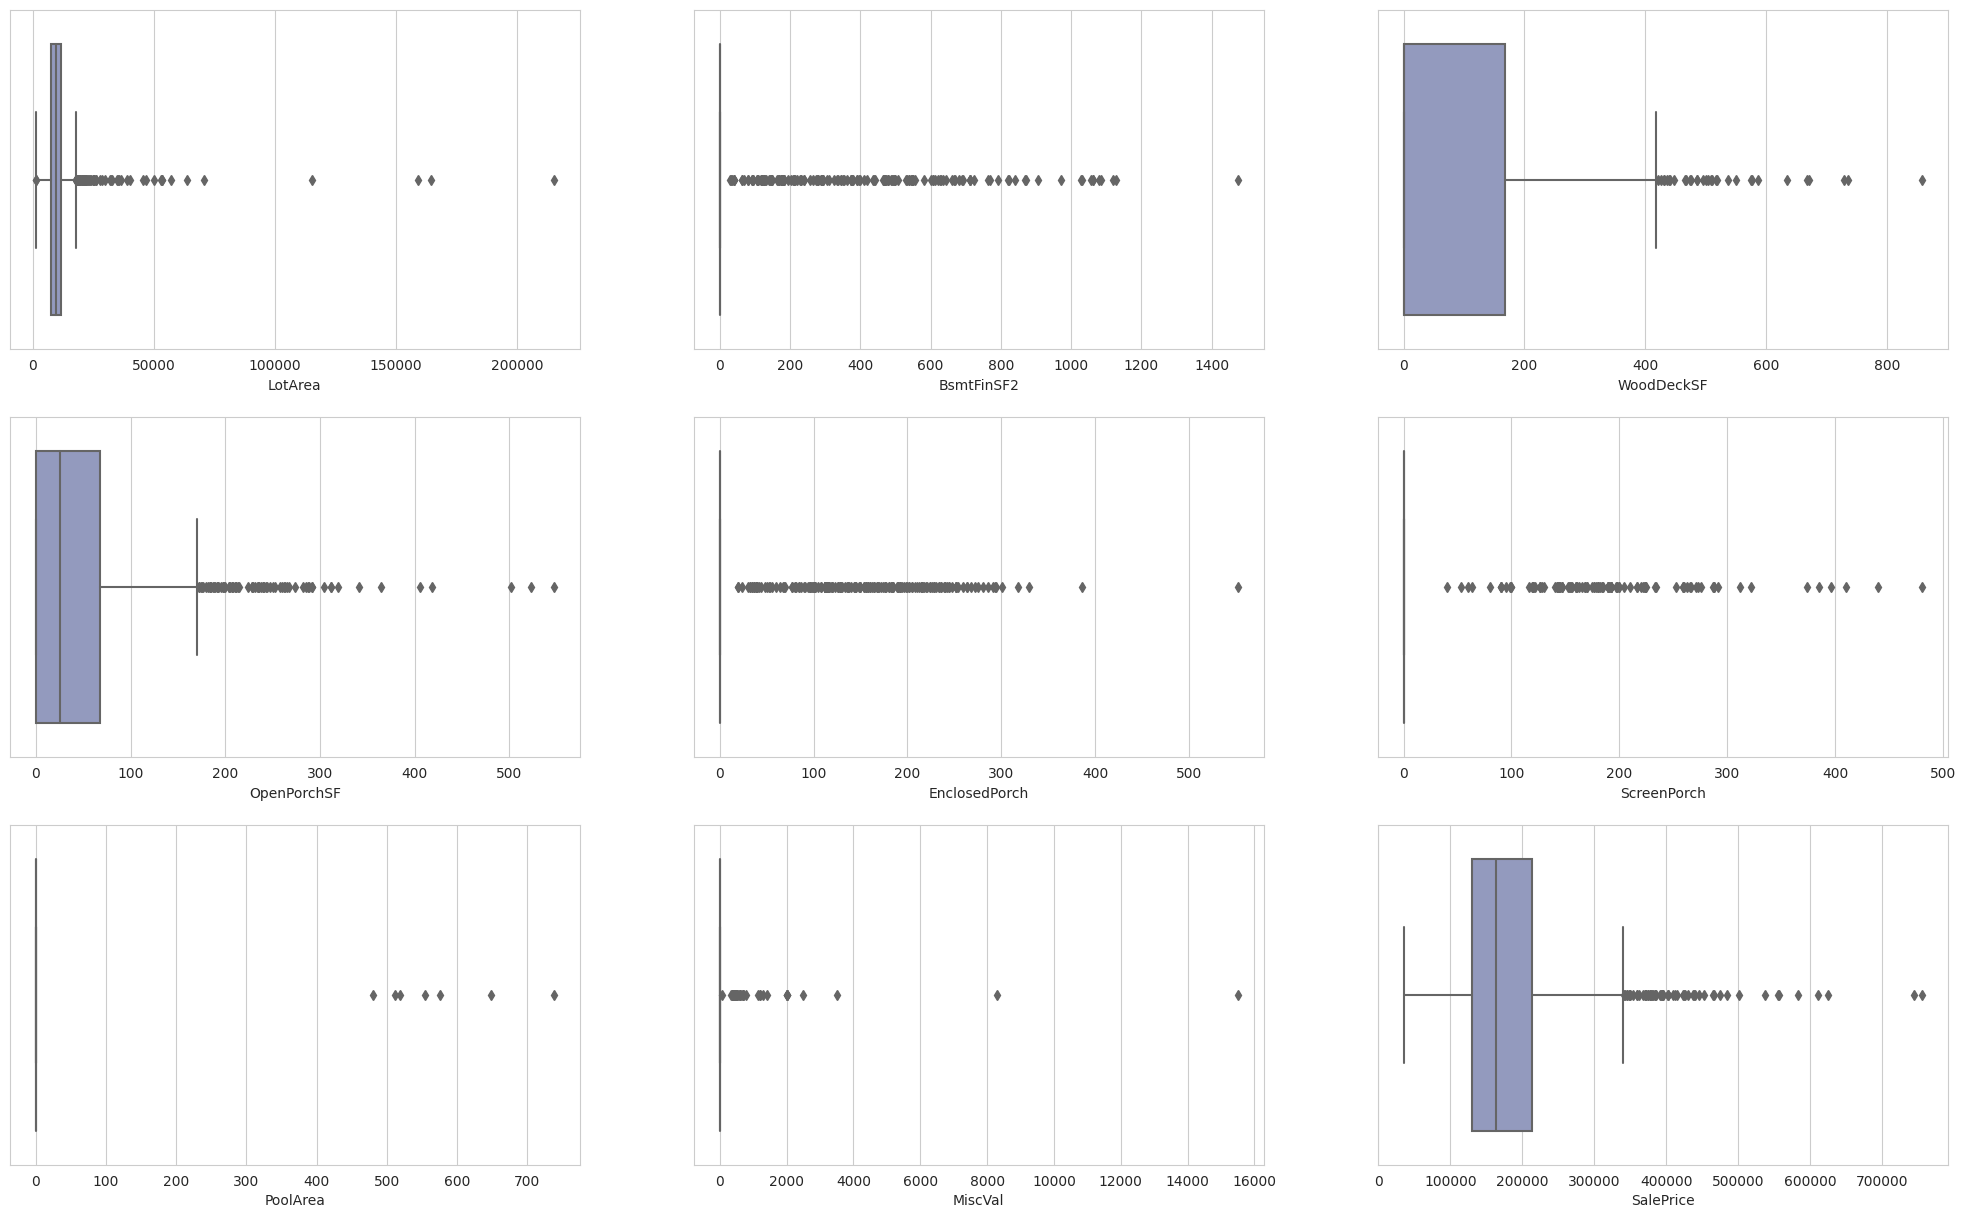

In [28]:
fig , ax = plt.subplots(3,3,figsize = (25,15))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (numDf, ax.flatten()):
  sns.boxplot(x = numDf[i], ax = subplots, palette = 'BuPu')
  # plt.xlabel('{}'.format(df[i]))
plt.show()

Here, Significant amount of outliers are present in our dataset. Therefore, we will use the MinMax Scaler approach.

In [29]:
X = finalDf.drop(columns=['Id', 'SalePrice'], axis=1)
y = finalDf[['SalePrice']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
numDf_Cols = ['LotArea', 'BsmtFinSF2', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','ScreenPorch', 'PoolArea', 'MiscVal']
minMaxScale = MinMaxScaler()
X_train[numDf_Cols] = minMaxScale.fit_transform(X_train[numDf_Cols])
X_train[numDf_Cols].head()

,LotArea,BsmtFinSF2,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal
1312,0.049281,0.000000,0.583431,0.000000,0.0,0.000000,0.0,0.0
1408,0.038050,0.000000,0.000000,0.000000,0.0,0.381818,0.0,0.0
1165,0.049091,0.000000,0.000000,0.227092,0.0,0.000000,0.0,0.0
1346,0.117994,0.046133,0.000000,0.159363,0.0,0.000000,0.0,0.0
399,0.040410,0.000000,0.000000,0.334661,0.0,0.000000,0.0,0.0


In [32]:
lrg = LinearRegression()
lrg.fit(X_train, y_train)

LinearRegression()

In [33]:
minMaxScale = MinMaxScaler()
X_test[numDf_Cols] = minMaxScale.fit_transform(X_test[numDf_Cols])
X_test[numDf_Cols].head()

,LotArea,BsmtFinSF2,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal
1054,0.047054,0.000000,0.297904,0.109689,0.0,0.0,0.0,0.0
361,0.036664,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1282,0.035056,0.135721,0.000000,0.000000,0.0,0.6,0.0,0.0
161,0.057903,0.000000,0.598802,0.000000,0.0,0.0,0.0,0.0
515,0.051041,0.000000,0.233533,0.098720,0.0,0.0,0.0,0.0


In [34]:
y_pred = lrg.predict(X_test)
print('R-squared Score on test data {}'.format(r2_score(y_test, y_pred)))

R-squared Score on test data 0.6105259754744262


In [35]:
y_train_pred = lrg.predict(X_train)
print('R-squared Score on train data {}'.format(r2_score(y_train, y_train_pred)))

R-squared Score on train data 0.7769850640236228


<Figure size 1500x600 with 0 Axes>

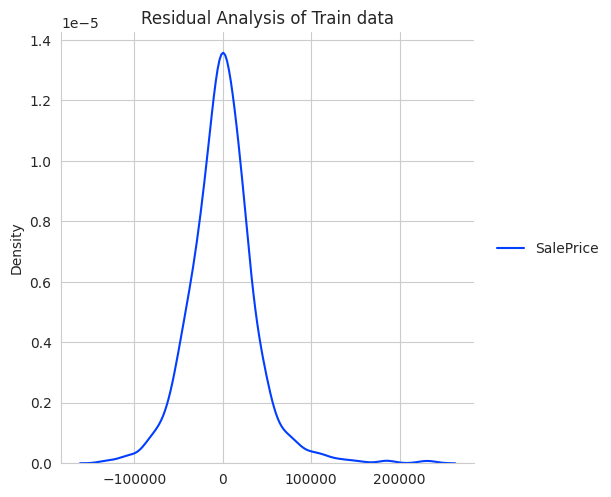

In [36]:
# Residual Analysis of Train Data

res = y_train - y_train_pred

plt.figure(figsize=(15,6))
sns.displot(res, kind='kde')
plt.title('Residual Analysis of Train data')
plt.show()

<Figure size 1500x600 with 0 Axes>

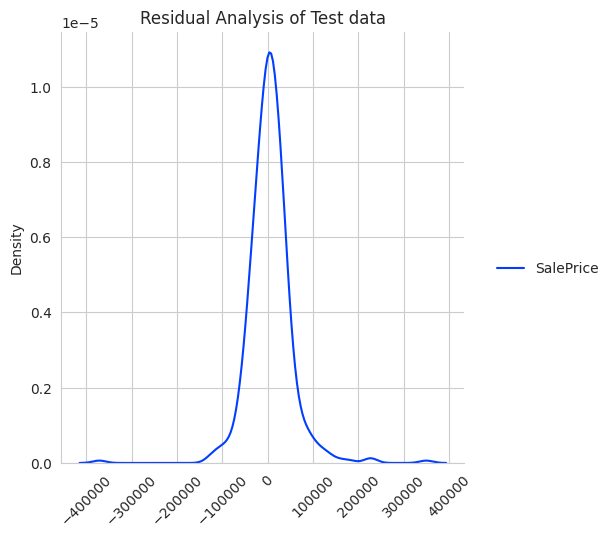

In [37]:
res = y_test - y_pred

plt.figure(figsize=(15,6))
sns.displot(res, kind='kde')
plt.xticks(rotation=45)
plt.title('Residual Analysis of Test data')
plt.show()

Here, We can clearly see that our model is highly overfitted, We will do the recursive feature selection of our model and than we will perform the Ridge regression on it.

In [38]:
len(finalDf.columns)

144

In [39]:
y_pred_train = lrg.predict(X_train)
y_pred_test = lrg.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.7769850640236228
0.6105259754744262
SalePrice    1.438455e+12
dtype: float64
SalePrice    1.073492e+12
dtype: float64
1407490663.4740572
2450894884.9447675


# Ridge Regression

In [40]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


The best value of lambda after performing Cross-Validation the best value of lambda is 7.0 for ridge regression.

In [42]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 6.17561561e+02  2.68096816e+04  2.76171257e+03  4.68957749e+03
  -5.78669395e+03  2.22473083e+04  2.99890793e+04  4.93152840e+04
  -8.37406915e+02  7.89184361e+01  1.36206626e+04  3.01056245e+04
  -1.54964472e+03  1.13242603e+02 -2.41376689e+03 -8.52912887e+03
   7.78092533e+03  5.60999816e+03 -2.27202617e+04  2.14584262e+03
   1.36700112e+04 -1.50750604e+03 -3.32152431e+03  4.59757225e+03
  -1.46589771e+04  8.93821390e+03 -2.06762359e+03  1.85187832e+04
  -1.19695609e+04 -7.52005725e+03 -2.05532494e+04 -2.10629054e+03
  -3.20362754e+03 -2.35800789e+04 -1.99491836e+04 -7.29405662e+03
   5.22714986e+03 -3.22862396e+04 -3.63507605e+04 -2.25902575e+04
  -2.63821879e+04 -3.61411637e+04 -1.99060825e+04  6.38173818e+04
   6.18788366e+04 -2.42942907e+04 -6.90011134e+03 -3.68079844e+04
  -1.43737537e+04  5.54299668e+04 -7.52739845e+02 -5.86584635e+03
  -1.16593927e+04  9.14774626e+03 -6.43059983e+03  1.27998817e+03
  -1.49102577e+03 -8.67648266e+03 -1.33764414e+04  6.31540722e+01
  -6.21736

In [43]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7485412660814931
0.6460114676101505
SalePrice    1.621919e+12
dtype: float64
SalePrice    9.756847e+11
dtype: float64
1587005007.9372053
2227590618.9641647


# Lasso Regression.

In [44]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [46]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=100)

The best value of lambda for lasso regression is 100.

In [47]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

y_pred_train = y_pred_train.reshape(1022,1)
y_pred_test = y_pred_test.reshape(438,1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7557308871122315
0.6401645253901008
SalePrice    1.575546e+12
dtype: float64
SalePrice    9.918004e+11
dtype: float64
1541629910.3887932
2264384448.275743


In [48]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.776985,0.748541,0.755731
1,R2 Score (Test),0.610526,0.646011,0.640165
2,RSS (Train),SalePrice 1.438455e+12 dtype: float64,SalePrice 1.621919e+12 dtype: float64,SalePrice 1.575546e+12 dtype: float64
3,RSS (Test),SalePrice 1.073492e+12 dtype: float64,SalePrice 9.756847e+11 dtype: float64,SalePrice 9.918004e+11 dtype: float64
4,MSE (Train),37516.538533,39837.231429,39263.59523
5,MSE (Test),49506.513561,47197.358178,47585.548734


 **From given three models Linear regresssion, Ridge Regression and Lasso Regression the best Model is Ridge regression, Although none of the model is generalizable and all three models is getting overfit but Ridge regression gives descent R2 Score on train and test data.**

In [69]:
impFeature = pd.DataFrame(list(zip(ridge.feature_names_in_, ridge.coef_[0])), columns=['Feature', 'Feature_Coefficent'])

In [76]:
barImp = impFeature.sort_values('Feature_Coefficent', ascending=False).head(20)

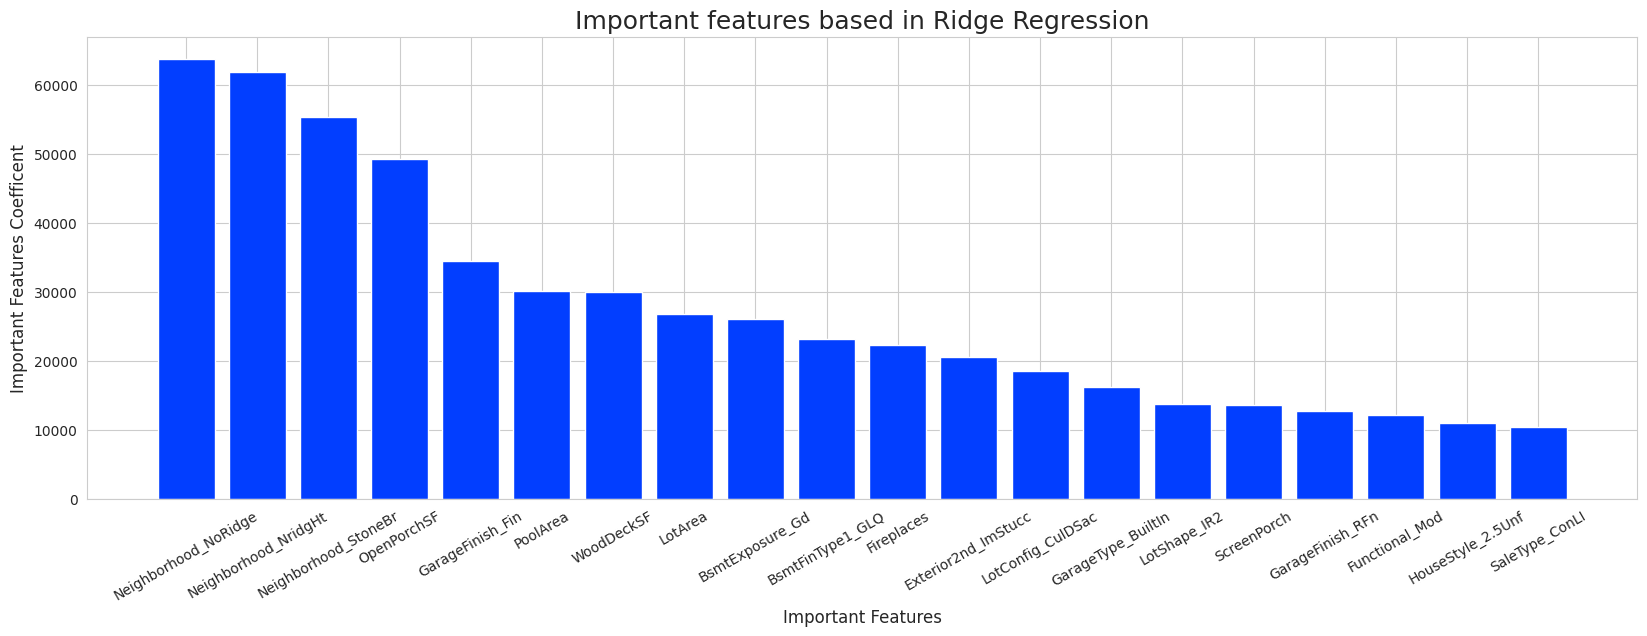

In [89]:
plt.figure(figsize=(20,6))
plt.bar(barImp['Feature'], barImp['Feature_Coefficent'])
plt.xlabel('Important Features', fontsize=12)
plt.ylabel('Important Features Coefficent', fontsize=12)
plt.xticks(rotation=30)
plt.title('Important features based in Ridge Regression', fontsize=18)
plt.show()

## Following are the top 20 features.

['Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'OpenPorchSF',
 'GarageFinish_Fin',
 'PoolArea',
 'WoodDeckSF',
 'LotArea',
 'BsmtExposure_Gd',
 'BsmtFinType1_GLQ',
 'Fireplaces',
 'Exterior2nd_ImStucc',
 'LotConfig_CulDSac',
 'GarageType_BuiltIn',
 'LotShape_IR2',
 'ScreenPorch',
 'GarageFinish_RFn',
 'Functional_Mod',
 'HouseStyle_2.5Unf',
 'SaleType_ConLI']